In [175]:
import s3fs
import xarray as xr
import s3fs
import seaborn as sns
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [176]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [177]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [178]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [179]:
filelist = [make_file_path_for_var(v) for v in varl]

In [180]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds_aero2012 = xr.open_mfdataset(list_of_s3_obj)

In [181]:
sulphate_varl = ['SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR'] 

In [182]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [183]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds2012 = xr.open_mfdataset(list_of_s3_obj)

In [184]:
ds2012['SO4_tot'] = 0
for var in sulphate_varl:
    ds2012['SO4_tot'] = ds2012['SO4_tot'] + ds2012[var]

ds2012['SO4_tot'].attrs['units'] = ds2012[var].attrs['units']

In [185]:
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058

rho = p_standard/(R*T_standard)

In [186]:
var = 'SO4_tot'
if ds2012[var].attrs['units'] =='kg/kg':
    ds2012[var] = ds2012[var]*rho
    ds2012[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds2012[var] = ds2012[var]*1e9
    ds2012[var].attrs['units'] = 'ug/m3'     

In [187]:
ds2012 =xr.merge([ds2012,ds_aero2012])

In [188]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [189]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [190]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds = xr.open_mfdataset(list_of_s3_obj)

In [191]:
ds['SO4_tot'] = 0
for var in sulphate_varl:
    ds['SO4_tot'] = ds['SO4_tot'] + ds[var]

ds['SO4_tot'].attrs['units'] = ds[var].attrs['units']

In [192]:
var = 'SO4_tot'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3' 

In [193]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [194]:
filelist = [make_file_path_for_var(v) for v in varl]

In [195]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds_aero = xr.open_mfdataset(list_of_s3_obj)

In [196]:
ds =xr.merge([ds,ds_aero])

In [197]:
ds2012= ds2012.sel(time= slice('2012-01-01','2014-12-31'))

In [198]:
ds = xr.merge([ds2012,ds])#,join='left')
ds.compute()

<xarray.Dataset>
Dimensions:   (lev: 32, time: 52632, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables: (12/13)
    SO4_A1    (location, time, lev) float32 2.541e-13 1.372e-13 ... 5.866e-12
    SO4_A2    (location, time, lev) float32 2.406e-17 3.728e-17 ... 9.327e-11
    SO4_AC    (location, time, lev) float32 4.202e-17 1.356e-17 ... 2.163e-13
    SO4_NA    (location, time, lev) float32 3.873e-13 2.309e-13 ... 3.032e-12
    SO4_PR    (location, time, lev) float32 8.458e-15 4.064e-15 ... 1.374e-11
    SO4_tot   (location, time, lev) float64 0.0008288 0.0004748 ... 0.1481
    ...        ...
    N100      (location, time, lev) float64 0.003671 0.004514 ... 53.48 164.1
    N200      (location, time, lev) float64 7.565e-05 9.453e-05 ... 9.551 28.56
    N50       (location, time, lev) float64 0.03781 0.047 0.2253 ... 159.1 437.4
    SS_A1     (location, time, lev) float32 2.527e-23 1.084e-22 ... 9.831e-11
    SS_A2     (location, time, lev) float32 2.14e-25 1.133e-25 ... 6.596e-10
    SS_A3     (location, time, lev) float32 1.63e-28 1.742e-28 ... 2.424e-09

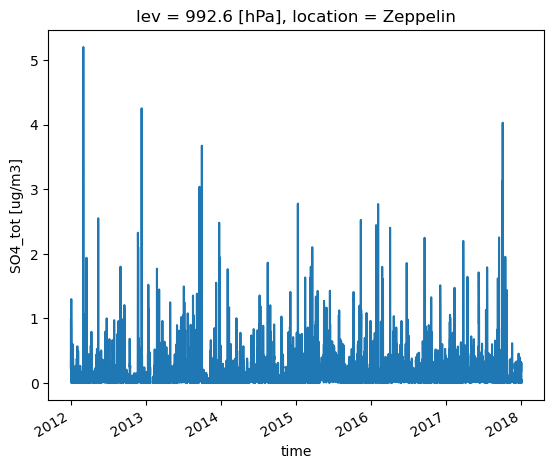

In [199]:
ds['SO4_tot'].sel(location = 'Zeppelin').isel(lev = -1).plot()